<a href="https://colab.research.google.com/github/joarca01/ML-course-ICL/blob/main/coursework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework 1 - Mathematics for Machine Learning

## CID: 06067859

***
***

## Exercise 1: [20 points]

### Part 1

#### Question 1:

Enter your answer here

#### Question 2:

Enter your answer here

#### Question 3:

Enter your answer here

***
### Part 2

#### Question 1:

Enter your answer here

#### Question 2:

Enter your answer here

#### Question 3:

Enter your answer here

#### Question 4:

Enter your answer here

#### Question 5:

Enter your answer here

***
### Part 3

#### Question 1:

Enter your answer here

#### Question 2:

Enter your answer here

#### Question 3:

Enter your answer here

#### Question 4:

Enter your answer here

***
***

## Exercise 2: [15 points]


#### Question 1



#### Question 2


#### Question 3


#### Question 4


#### Question 5


#### Question 6


#### Question 7

***
***

## Exercise 3: [15 points]

In [45]:
# Importing necessary libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Train-validation-test split
num_samples = X_tensor.shape[0]
train_size = int(0.7 * num_samples)
val_size = int(0.15 * num_samples)
test_size = num_samples - train_size - val_size

X_train = X_tensor[:train_size]
y_train = y_tensor[:train_size]
X_val = X_tensor[train_size:train_size + val_size]
y_val = y_tensor[train_size:train_size + val_size]
X_test = X_tensor[train_size + val_size:]
y_test = y_tensor[train_size + val_size:]
print(X_train.shape, y_train.shape)

print(X_train[:5])
print(X_test[:5])

torch.Size([14447, 8]) torch.Size([14447, 1])
tensor([[ 2.3448,  0.9821,  0.6286, -0.1538, -0.9744, -0.0496,  1.0525, -1.3278],
        [ 2.3322, -0.6070,  0.3270, -0.2633,  0.8614, -0.0925,  1.0432, -1.3228],
        [ 1.7827,  1.8562,  1.1556, -0.0490, -0.8208, -0.0258,  1.0385, -1.3328],
        [ 0.9330,  1.8562,  0.1570, -0.0498, -0.7660, -0.0503,  1.0385, -1.3378],
        [-0.0129,  1.8562,  0.3447, -0.0329, -0.7598, -0.0856,  1.0385, -1.3378]])
tensor([[-0.5548,  1.8562, -0.5186, -0.1681, -0.0790,  0.0173,  0.8044, -1.1531],
        [-0.6337,  1.8562,  0.0902, -0.1224, -0.7254, -0.0147,  0.7997, -1.1481],
        [ 1.4548,  1.8562,  0.0704, -0.5086, -0.6848,  0.0269,  0.7997, -1.1481],
        [-0.7580,  0.8232, -0.2141, -0.0580,  0.4985,  0.0830,  0.7997, -1.1481],
        [-0.6524,  1.8562, -0.6506, -0.1575, -0.1426,  0.2405,  0.7997, -1.1531]])



#### Question 1

In [46]:
class BaseNetwork(nn.Module):
    def __init__(self, act_fn, input_size=8, output_size=1, hidden_sizes=[32, 16, 8]):

        """
        Build a fully connected feedforward neural network with the following architecture.

        Inputs:
            act_fn - Object of the activation function that should be used as non-linearity in the network.
            input_size - Size of the input data.
            output_size - Number of classes we want to predict.
            hidden_sizes - A list of integers specifying the hidden layer sizes in the NN. Set to default.
        """
        super().__init__()

        # Initialize the layers list as empty.
        layers = []

        # Add input layer and activation function to layers list.
        layers += [nn.Linear(input_size, hidden_sizes[0]), act_fn]

        # Add hidden layers to layers list and activation function after each layer.
        for layer_index in range(1, len(hidden_sizes)):
            layers += [nn.Linear(hidden_sizes[layer_index-1], hidden_sizes[layer_index]), act_fn]

        # Add output layer to layers list (no activation function after output layer).
        layers += [nn.Linear(hidden_sizes[-1], output_size)]

        # Create the network as a sequence of layers.
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        # Flatten the input.
        x = x.view(x.size(0), -1)

        # Pass the input through the layers.
        out = self.layers(x)

        return out


#### Question 2

In [47]:

# Create an instance with ReLU activation and specific hidden layer sizes.
mynet = BaseNetwork(act_fn=nn.ReLU(), hidden_sizes=[32, 16, 8])

# Check input and output sizes from the dataset.
input_size = X_tensor.shape[1]   # Number of house input features
output_size = y_tensor.shape[1]  # Target output size (price)

print(f"Input size: {input_size}, Output size: {output_size}\n")

# Verify with a forward pass using a sample batch.
sample_batch = X_train[:5]  # Take 5 samples
output = mynet(sample_batch)
print(f"Sample input shape: {sample_batch.shape}, Output shape: {output.shape}\n")

# Print model architecture.
print(mynet)

for p in mynet.parameters():
  print(p.shape)
  print(p.grad)

Input size: 8, Output size: 1

Sample input shape: torch.Size([5, 8]), Output shape: torch.Size([5, 1])

BaseNetwork(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
  )
)
torch.Size([32, 8])
None
torch.Size([32])
None
torch.Size([16, 32])
None
torch.Size([16])
None
torch.Size([8, 16])
None
torch.Size([8])
None
torch.Size([1, 8])
None
torch.Size([1])
None


Let us explain the following code:

\begin{align}
\texttt{for} &\texttt{ p in mynet.parameters():}\\
  &\texttt{print(p.shape)}\\
  &\texttt{print(p.grad)}
\end{align}

The instance $\texttt{mynet.parameters()}$ returns all parameters in my model for each layer (weight matrix and bias vector). This are the parameters the models optmises. For each of these parameters (a PyTorch tensor), we print its shape. For example, the irst layer weights are $(32, 8)$ (32 neurons, 8 input features), which coincides with the output of $\texttt{print(mynet)}$. Lastly, $\texttt{p.grad}$ returns the gradient of that parameter afer backpropagation (partial derivative of the loss with respect to parameter). Observe that the code above returns $\texttt{None}$ since we have not yet performed backpropagation.


#### Question 3

In [53]:
class Optimizer:

    def __init__(self, mynet, X, y, learning_rate, tolerance=1e-6):
        '''
        Initializes the Optimizer.

        Parameters
        ----------
        mynet : nn.Module
            The neural network model to be optimized.
        X : 2D torch Tensor
            Input data with dimensions (n_samples, n_features).
        y : 2D torch Tensor
            Output/target data with dimension (n_samples, 1).
        learning_rate : float
            Learning rate or regularization parameter.
        tolerance : float, optional
            Tolerance for convergence criteria.
        '''

        # Storing initial data
        self.X = X
        self.y = y

        # Extracting dimensions
        self.n_sample, self.n_feature = X.shape

        self.net = mynet

        self.learning_rate = learning_rate

        self.tolerance = tolerance

        # Algorithm history
        self.obj_history = [self.myloss(self.X, self.y).item()]


    def myloss(self, X, y):
        """
        Compute Mean Squared Error between the network predictions at X and the true labels y.

        Parameters
        ----------
            X : 2D torch Tensor
                Input data with dimensions (n_samples, n_features).
            y : 1D torch Tensor
                Output/target data with dimension (n_samples,).
        Output: 1D torch scalar Tensor
                Loss representing the MSE
        """

        # Forward pass through mynet: get predictions
        predictions = self.net(X)


        # Mean Squared Error
        loss = torch.mean((predictions - y) ** 2)

        return loss


    def plot_loss(self):

        if len(self.obj_history) == 1:
            raise ValueError('No history to plot.')

        fig, ax = plt.subplots(figsize=(8, 4))
        ax.plot(self.obj_history, color='k')
        ax.set_ylabel('Objective Function Value')
        ax.set_xlabel('Iteration')
        ax.grid()
        fig.tight_layout()
        plt.show()


#### Question 4

In [67]:
class GradientDescentOptimizer(Optimizer):

    def __init__(self, mynet, X, y, learning_rate, tolerance=1e-6):
        '''
        Constructor for the Gradient Descent optimizer to minimize the loss function defined in
        Question 3.

        Parameters
        ----------
        X : 2D PyTorch tensor
            Input data with dimensions (n_samples, n_features).
        y : 1D PyTorch tensor
            Output/target data with dimension (n_samples,).
        learning_rate : float
            Learning rate for the optimization algorithm.
        '''

        super().__init__(mynet, X, y, learning_rate, tolerance=tolerance)
        self.algorithm_name = 'Gradient Descent'

    def run(self, max_iter=1000):
        '''
        Runs the Gradient Descent optimization algorithm.

        Parameters
        ----------
        max_iter : int, optional
            Maximum number of iterations for the optimization process. Default set to 1000.
        '''
        n_iter = 0
        while n_iter < max_iter:

            # Zero gradients from previous step.
            for p in self.net.parameters():
                if p.grad is not None:
                    p.grad.zero_()

            # Gradient computation.
            loss = self.myloss(self.X, self.y)
            loss.backward()

            # Update parameters manually.
            with torch.no_grad():
                for p in self.net.parameters():
                    p -= self.learning_rate * p.grad

            # History update
            self.obj_history.append(loss.item())

            n_iter += 1

            # Convergence check
            if n_iter > 1 and abs(self.obj_history[-2] - self.obj_history[-1]) <= self.tolerance:
                print(f'{self.algorithm_name} has converged in {n_iter} iterations')
                break

        if n_iter == max_iter:
            print(f'{self.algorithm_name} has reached the maximum number of iterations ({max_iter})')

    def plot_learned_model(self):
        # Inherited from 'Optimizer' class with the algorithm name
        super().plot_learned_model(self.algorithm_name)




### Question 5

In [72]:
# Train the neural network.
optimizer = GradientDescentOptimizer(mynet, X_train, y_train, learning_rate=1e-3, tolerance=1e-6)
optimizer.run(max_iter=1000)

Gradient Descent has reached the maximum number of iterations (1000)


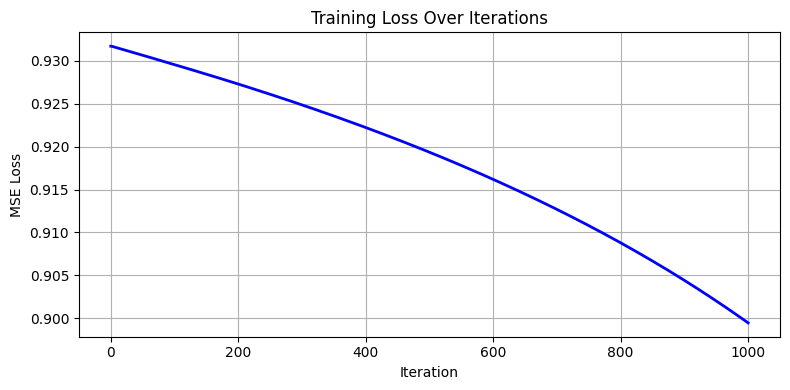

In [69]:
# Plot the training loss over iterations.
plt.figure(figsize=(8, 4))
plt.plot(optimizer.obj_history, color='blue', linewidth=2)
plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# Compute and report the loss over the validation dataset.
val_loss = optimizer.myloss(X_val, y_val.view(-1, 1))
print(f"Validation Loss (MSE): {val_loss.item():.6f}")

Validation Loss (MSE): 1.226811


The loss (MSE) over the validation sample is 8.013973.


Training with activation function ReLU
Gradient Descent has reached the maximum number of iterations (1000)
Final step Training Loss: 0.913061
Validation Loss (MSE): 1.252878


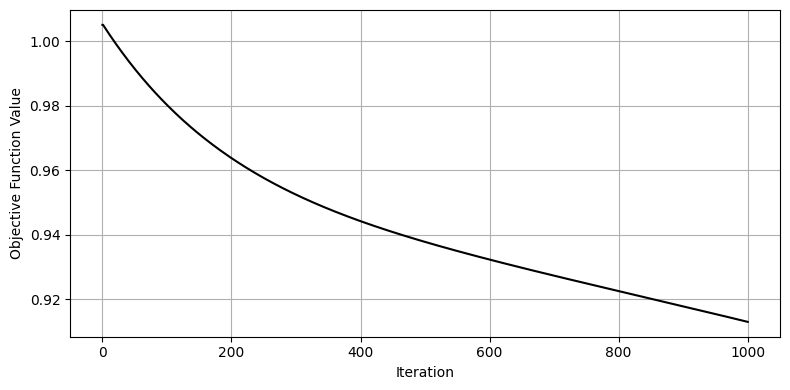


Training with activation function Tanh
Gradient Descent has reached the maximum number of iterations (1000)
Final step Training Loss: 0.582511
Validation Loss (MSE): 1.071454


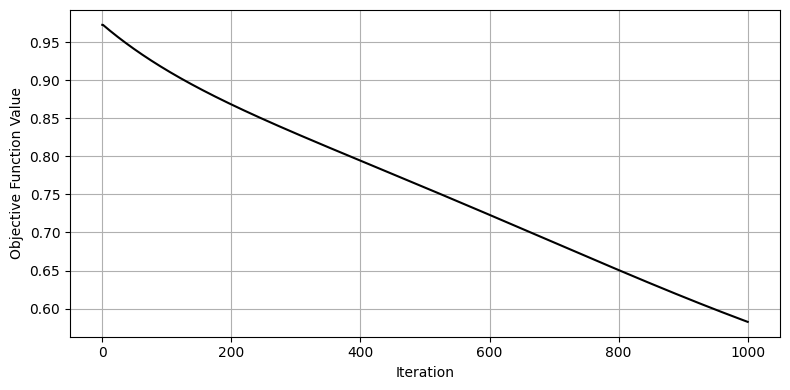


Training with activation function Sigmoid
Gradient Descent has converged in 757 iterations
Final step Training Loss: 0.945426
Validation Loss (MSE): 1.270322


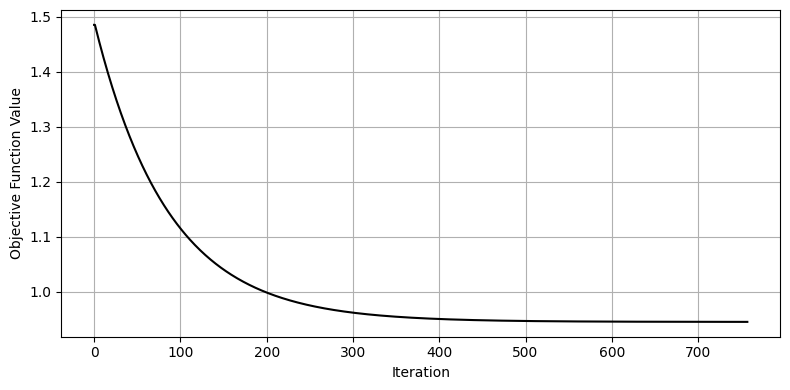


Training with activation function LeakyReLU
Gradient Descent has reached the maximum number of iterations (1000)
Final step Training Loss: 0.899499
Validation Loss (MSE): 1.224375


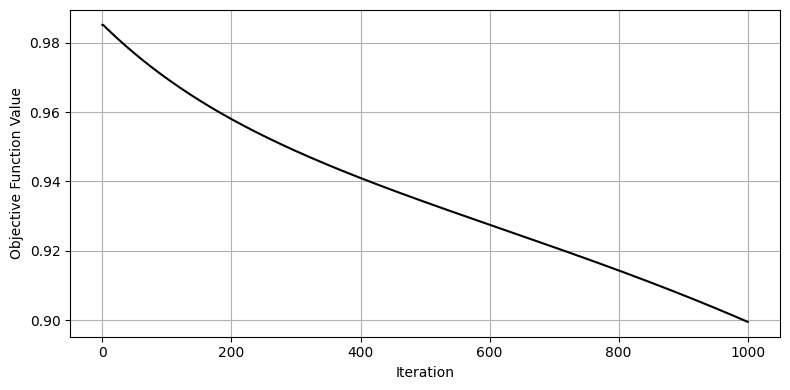


Training with activation function ELU
Gradient Descent has reached the maximum number of iterations (1000)
Final step Training Loss: 0.496369
Validation Loss (MSE): 0.962390


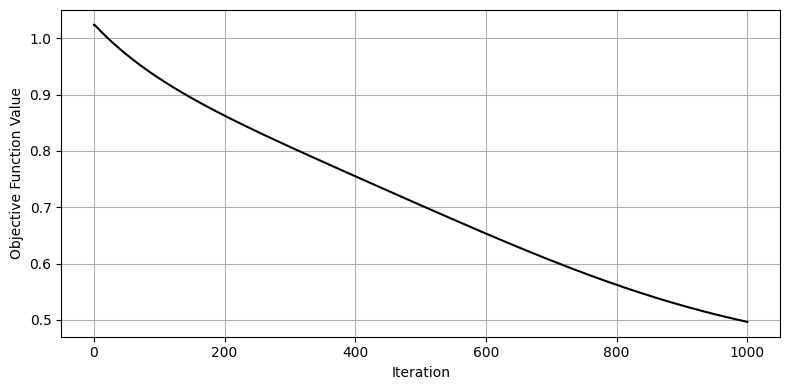


Training with activation function SELU
Gradient Descent has reached the maximum number of iterations (1000)
Final step Training Loss: 0.414473
Validation Loss (MSE): 0.776320


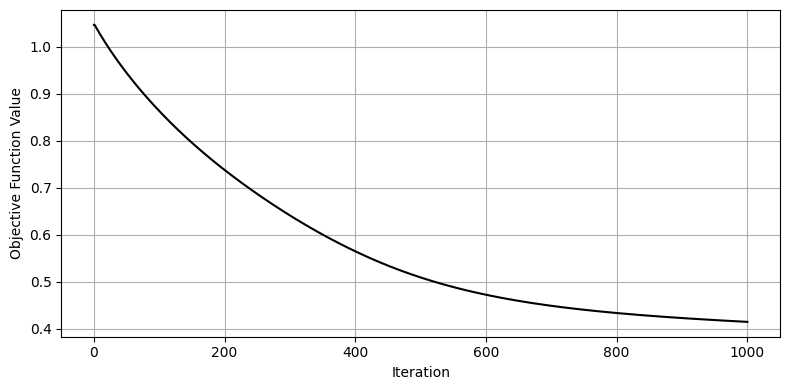

In [71]:
# Experiment with different activation functions
activations = [nn.ReLU(), nn.Tanh(), nn.Sigmoid(), nn.LeakyReLU(), nn.ELU(), nn.SELU()]

for act in activations:
    print(f"\nTraining with activation function {act.__class__.__name__}")
    mynet = BaseNetwork(act_fn=act)
    optimizer = GradientDescentOptimizer(mynet, X_train, y_train, learning_rate=1e-3, tolerance=1e-6)
    optimizer.run(max_iter=1000)
    print(f"Final step Training Loss: {optimizer.obj_history[-1]:.6f}")
    val_loss = optimizer.myloss(X_val, y_val.view(-1, 1))
    print(f"Validation Loss (MSE): {val_loss.item():.6f}")
    optimizer.plot_loss()


SELU activation achieves a validation loss (MSE) of 0.776320.


### Question 6

In [73]:
class AcceleratedGradient(Optimizer):
    def __init__(self, mynet, X, y, learning_rate, tolerance=1e-6):
        '''
        Constructor for the Accelerates Gradient Descent optimizer to minimize
        the loss function defined in Question 4 in Exercise 2.

        Parameters
        ----------
        X : 2D PyTorch tensor
            Input data with dimensions (n_samples, n_features).
        y : 1D PyTorch tensor
            Output/target data with dimension (n_samples,).
        learning_rate : float
            Learning rate for the optimization algorithm.
        '''
        super().__init__(mynet, X, y, learning_rate, tolerance=tolerance)
        self.algorithm_name = 'Accelerated Gradient Descent'

    def run(self, max_iter=1000):
        '''
        Runs the optimization algorithm.

        Parameters
        ----------
        max_iters : int, optional
            Maximum number of iterations to run the algorithm. The default is 1000.
        '''
        n_iter = 0
        self.net.train()

        # Define initial parameters.

        t_curr = 0
        t_prev = 1
        prev_params = [p.clone().detach() for p in self.net.parameters()]
        curr_params = [p.clone().detach() for p in self.net.parameters()]

        while n_iter < max_iter:
            # Compute t_{k+1}.
            t_next = (1 + torch.sqrt(torch.tensor(1 + 4 * t_curr**2))) / 2

            # Compute auxiliary parameter \bar{x}_k.
            with torch.no_grad():
                for p, xk, xk_prev in zip(self.net.parameters(), curr_params, prev_params):
                    p.copy_(xk + ((t_curr - 1) / t_next) * (xk - xk_prev))

            # Zero gradients from previous step.
            for p in self.net.parameters():
                if p.grad is not None:
                    p.grad.zero_()

            # Gradient computation.
            loss = self.myloss(self.X, self.y)
            loss.backward()

            # Update parameters manually (gradient step).
            new_params = []
            with torch.no_grad():
                for p in self.net.parameters():
                    new_p = p - self.learning_rate * p.grad
                    new_params.append(new_p.clone())
                    p.copy_(new_p)

            # Update histories.
            self.obj_history.append(loss.item())
            prev_params = curr_params
            curr_params = new_params
            t_prev, t_curr = t_curr, t_next

            n_iter += 1

            # Convergence check
            if n_iter > 1 and abs(self.obj_history[-2] - self.obj_history[-1]) <= self.tolerance:
                print(f'{self.algorithm_name} has converged in {n_iter} iterations')
                break

        if n_iter == max_iter:
            print(f'{self.algorithm_name} has reached the maximum number of iterations ({max_iter})')

    def plot_learned_model(self):
        # Inherited from 'Optimizer' class with the algorithm name
        super().plot_learned_model(self.algorithm_name)

In [74]:
# Train the neural network.
mynet = BaseNetwork(act_fn=nn.SELU())
optimizer = GradientDescentOptimizer(mynet, X_train, y_train, learning_rate=1e-3, tolerance=1e-6)
optimizer.run(max_iter=1000)

Gradient Descent has reached the maximum number of iterations (1000)


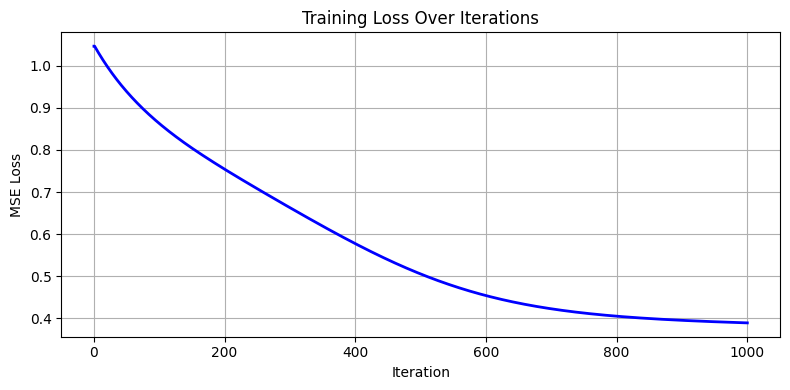

In [75]:
# Plot the training loss over iterations.
plt.figure(figsize=(8, 4))
plt.plot(optimizer.obj_history, color='blue', linewidth=2)
plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# Compute and report the loss over the validation dataset.
val_loss = optimizer.myloss(X_val, y_val.view(-1, 1))
print(f"Final step Training Loss: {optimizer.obj_history[-1]:.6f}")
print(f"Validation Loss (MSE): {val_loss.item():.6f}")

Final step Training Loss: 0.389114
Validation Loss (MSE): 0.709580


Compared to the results obtained using gradient descent, we see that the Accelerated Gradient Descent converges before the limit of 1000 iterations, with a training loss of ... and a validation loss of ...